In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10013573942675382270
]


### Lecture des données d'apprentissage et de test

In [97]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.zip",header=None)
print(Dtrain)
print(Dtrain.values[0,784])


X_train = Dtrain.values[:,:-1] # Reprend tout le tableau sauf la dernière colonne 
Y_train = Dtrain.values[:,-1] # Récupère la dernière colonne du tabelau qui correspond à ? 

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1] # label

       0    1    2    3    4    5    6    7    8    9   ...   775  776  777  \
0        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
2        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
3        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
4        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
5        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
6        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
7        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
8        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
9        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
10       0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
11       0    0    0    0    0    0    0    0    0  

In [4]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

### Etude des sorties de chaque couche 

#### Modèle sans décomposition des couches 

In [5]:
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))



# Résumé
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)      

In [6]:
# Apprentissage
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 1.2621 - acc: 0.8658 - val_loss: 0.0695 - val_acc: 0.9780
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1091 - acc: 0.9686 - val_loss: 0.0398 - val_acc: 0.9866
Epoch 3/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0805 - acc: 0.9773 - val_loss: 0.0353 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0635 - acc: 0.9818 - val_loss: 0.0344 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0553 - acc: 0.9845 - val_loss: 0.0324 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0472 - acc: 0.9861 - val_loss: 0.0341 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 96s 2ms/step - loss

In [7]:
model_imgs = model.predict(X_test_conv)


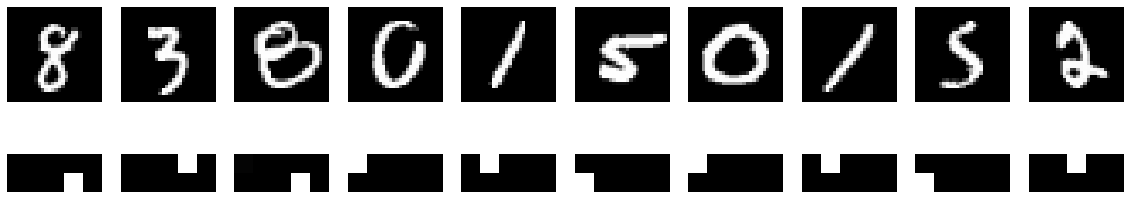

In [58]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## II. Modèle avec décomposition des couches  

In [9]:
Conv2D_1 = km.Sequential(name="conv2D1")
Conv2D_1.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last",name = "conv2D1"))

Conv2D_2 = km.Sequential(name="conv2D2")
Conv2D_2.add(kl.Conv2D(64, (3, 3), activation='relu',name ="conv2D2"))

Maxpool = km.Sequential(name="Maxpool")
Maxpool.add(kl.MaxPooling2D(pool_size=(2, 2), name ="Maxpool"))
Maxpool.add(kl.Dropout(0.25))
Maxpool.add(kl.Flatten())

Dense1 = km.Sequential(name = "dense1")
Dense1.add(kl.Dense(128, activation='relu',name ="dense1"))
Dense1.add(kl.Dropout(0.5))


Dense2 = km.Sequential(name ="dense2")
Dense2.add(kl.Dense(N_classes, activation='softmax',name ="dense2"))


modeldecomp = km.Sequential(name="modèle décomposé")
modeldecomp.add(Conv2D_1)
modeldecomp.add(Conv2D_2)
modeldecomp.add(Maxpool)
modeldecomp.add(Dense1)
modeldecomp.add(Dense2)
modeldecomp.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D1 (Sequential)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv2D2 (Sequential)         (None, 24, 24, 64)        18496     
_________________________________________________________________
Maxpool (Sequential)         (None, 9216)              0         
_________________________________________________________________
dense1 (Sequential)          (None, 128)               1179776   
_________________________________________________________________
dense2 (Sequential)          (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [10]:
modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 93s 2ms/step - loss: 1.7538 - acc: 0.8363 - val_loss: 0.0733 - val_acc: 0.9770
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1180 - acc: 0.9655 - val_loss: 0.0556 - val_acc: 0.9821
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0872 - acc: 0.9748 - val_loss: 0.0489 - val_acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0703 - acc: 0.9794 - val_loss: 0.0366 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0576 - acc: 0.9831 - val_loss: 0.0387 - val_acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0407 - val_acc: 0.9857
Epoch 7/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0393 - val_acc

In [11]:
modeldecomp_imgs = modeldecomp.predict(X_test_conv)
Conv2D_1_imgs =Conv2D_1.predict(X_test_conv)
Conv2D_2_imgs =Conv2D_2.predict(Conv2D_1_imgs)
Maxpool_imgs =Maxpool.predict(Conv2D_2_imgs)
Dense1_imgs =Dense1.predict(Maxpool_imgs)
Dense2_imgs =Dense2.predict(Dense1_imgs)


In [49]:
def selection_4(img) : # img correspond a l ensemble des sortie pour UNE SEULE image
    shape = np.shape(img)[2] 
    m = 0 
    for i in range(shape) :
        m = m + npl.norm(img[:,:,i])
    m = m / shape # cela correspond a la moyenne des normes de tous les neurones pour une image donnée 
                    # on considere cette moyenne comme etant un seuil de selection pour dire qu un neurone
                    # est activé ou non
    filtre_actif = img[npl.norm(img) > m]
    return filtre_actif
    

In [65]:
import numpy.linalg as npl

def selection_4(img) : 
    shape = np.shape(img)[2]
    m = 0
    vect_norm = np.zeros(shape)
    filtre_actif = []
    for i in range(shape) : 
        vect_norm[i] = npl.norm(img[:,:,i])
        m = m + vect_norm[i]
    m = m/shape
    
    for i in range(shape) :
        if vect_norm[i]>m : 
            filtre_actif += [i]
    filtre_actif = np.array(filtre_actif)
    return filtre_actif

def Affichage_select_4 (imgs,n) : 
    # n represente le nombre d'image que l'on décide de traiter
    # imgs reprensente les sorties intermédiaires d'une couche
    
    for i in range(n):
        index_active_filter = selection_4(imgs[i,:,:,:])
        m = len(index_active_filter)
        k = i*m +1
        print(k)
        for j in filtre_actif :
            fig = plt.figure(figsize=(20, 4))
            ax = fig.add_subplot(n,m,k) # Paramètres d'affichage ne sont pas bons
            ax.imshow(imgs[i,:,:,j])
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    

1
12
23


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


37


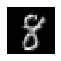

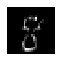

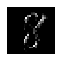

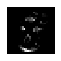

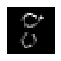

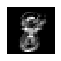

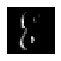

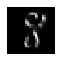

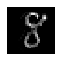

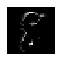

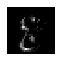

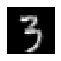

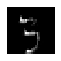

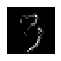

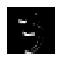

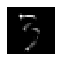

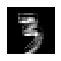

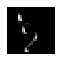

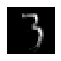

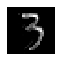

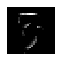

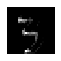

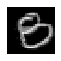

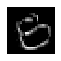

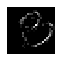

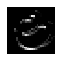

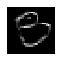

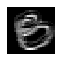

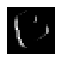

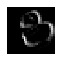

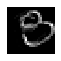

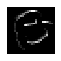

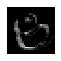

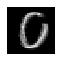

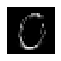

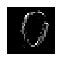

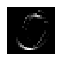

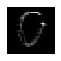

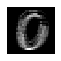

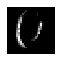

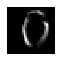

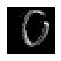

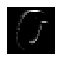

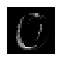

In [77]:
Affichage_select_4(Conv2D_1_imgs,4)



1
26
45


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


88


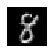

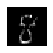

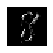

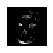

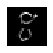

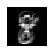

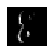

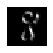

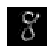

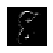

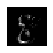

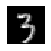

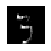

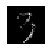

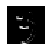

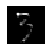

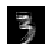

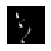

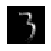

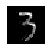

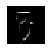

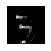

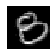

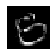

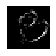

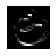

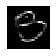

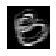

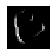

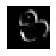

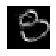

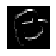

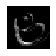

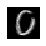

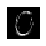

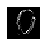

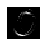

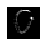

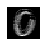

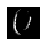

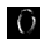

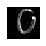

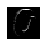

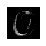

In [78]:
Affichage_select_4(Conv2D_2_imgs,4)

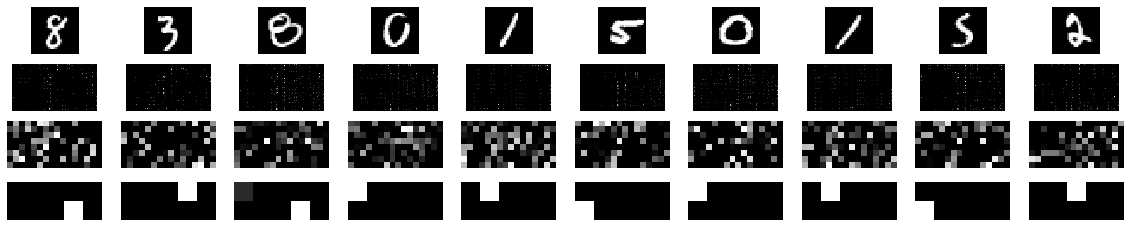

In [81]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, n, i + 1 + 3*n )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

## III. Comportement des filtres pour différentes écritures 

### 1. Isolement des données : 

In [104]:
def Segregation_label(data, label):
    data_isolated = []
    label_isolated = []
    n,m = np.shape(data)
    for i in range(n):
        if (data.values[i,m-1] == label):
            data_isolated += [data.values[i,:-1]]
            lablel_isolated += [data.values[i,-1]]
    return data_isolated




In [106]:
seg = Segregation_label(Dtrain, 2)
print(seg)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 2. Apprentissage sur ce jeu de données :

In [ ]:
modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(data_isolated, label_isolated,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))# Modifier ces deux derniers pour tester 



